# BoomBikes bikes-sharing Data Analysis

## This notebook is divided into three sections

### 1. Data Inspection

### 2. EDA

### 3. Model Selection and Analysis

# Section 1. Data Inspection

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

import scipy.stats as stats
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth', 20)



### Reading CSV file

In [2]:
# Reading csv file
bikes = pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bikes.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


### Checking file

In [4]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


#### The data has 730 rows and 16 columns, there are no null values, has 4 - float columns, 11 integer columns , and 1 object

In [5]:
# Checking Unique Values 
bikes.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

#### Columns 'instant' and 'dteday' have unique values, casual and registered adds up and gives count

### Checking value_counts of columns

In [6]:
bikes['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64


#### Season column is categorical where season (1:spring, 2:summer, 3:fall, 4:winter)

In [7]:
bikes['yr'].value_counts()

1    365
0    365
Name: yr, dtype: int64

#### Year 0 is 2018, and Year 1 is 2019 keeping it as it is .

In [8]:
bikes['mnth'].value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

#### mnth Column is also Categorical, 1 is January and 12 is December

In [9]:
bikes['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

### We can see the data is imbalanced

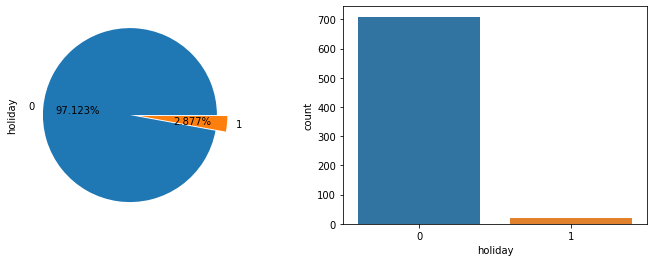

In [10]:
#Plotting Holiday Column
f, ax = plt.subplots(1, 2, figsize = (12,4))
bikes.holiday.value_counts().plot.pie(explode = [0,0.12], autopct = '%1.3f%%', ax = ax[0])
sns.countplot('holiday',data = bikes )
plt.show()

### Holiday column is imbalanced so it can be dropped.

In [11]:
bikes['weekday'].value_counts()

6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64

#### weekday column is categorical where 0 is Sunday and 6 is Saturday

In [12]:
bikes['workingday'].value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [13]:
bikes['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

#### weathersit column is Categorical can be mapped as {1 : Good, 2 : Fair, 3 : Poor, 4: Very Bad}

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Item 4 is not present in DataFrame

#### temp', 'atemp', 'hum', 'windspeed' are continuous columns . Values need to be scaled.

#### 'casual' +  'registered' =  'cnt' so casual and registered are not useful for analysis as bikes['cnt'] is our Target Variable

## Inferences after checking all columns
 
### Drop columns named 
    - ['instant', 'dtedate'] these are unique and not useful for analysis
    - ['holiday'] as it is biased
    - ['casual' ,  'registered'] as their sum is equal to out target variable 'cnt

### Change integer columns 
    - ['season',  'mnth', 'weekday', 'weathersit'] to object and map with categorical names
    -Then convert these columns to dummy variables

### Continuous values to be scaled before trying out in model

## Plot

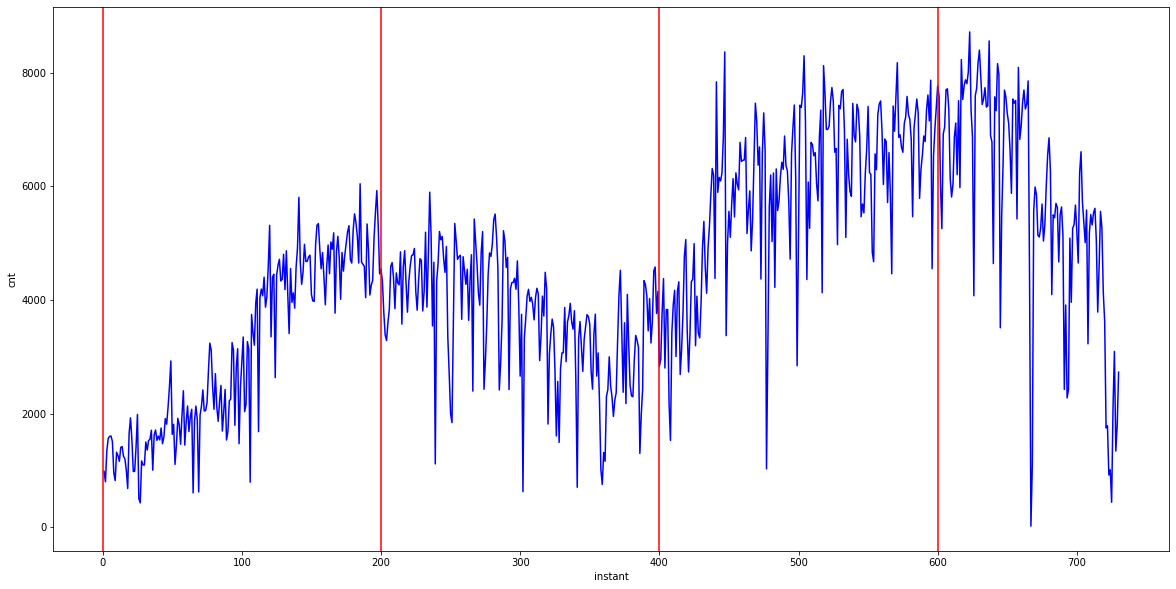

In [14]:
# Plotting count of total rental bikes including both casual and registered 
plt.figure(figsize = (20,10))

sns.lineplot(x = 'instant', y = 'cnt' , data = bikes, color = 'b')

xcords = list(range(0, 730, 200))
for xc in xcords:
    plt.axvline(x = xc, c = 'r')

#### We can see there is an increase in bike demand till the 1st half of 2018 then it started to decrease till December 2018. It it again increased till the 1st half of 2019, and later it was steady for some time and then it decreased sharply.

### Dropping Columns ['instant', 'dteday', 'holiday', 'casual', 'registered']

In [15]:
bikes.drop(['instant', 'dteday', 'holiday', 'casual', 'registered'], axis = 1, inplace = True)

In [16]:
bikes.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Converting Integer columns to Object ['season', 'mnth',  'weekday','weathersit']

In [17]:
bikes[['season', 'mnth', 'weekday','weathersit']] = bikes[['season', 'mnth', 'weekday','weathersit']].astype('object')
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 62.8+ KB


## Mapping Names

### Season

In [18]:
bikes['season'] = bikes['season'].map({1 : 'Spring', 2 : 'Summer', 3 : 'Fall', 4 : 'Winter'})
bikes['season'].value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

### Month

In [19]:
#Mapping Month Values to their respective names

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
         'August', 'September', 'October', 'November', 'December']
num = list(range(1, 13))
mydict = dict(zip(num, month))
mydict

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

In [20]:
bikes['mnth'] = bikes['mnth'].map(mydict)
bikes['mnth'].value_counts()

March        62
August       62
October      62
July         62
December     62
May          62
January      62
September    60
April        60
June         60
November     60
February     56
Name: mnth, dtype: int64

### Weekday

In [21]:
weekday = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
count = list(range(0, 7))
daydict = dict(zip(count, weekday))
daydict

{0: 'Sunday',
 1: 'Monday',
 2: 'Tuesday',
 3: 'Wednesday',
 4: 'Thursday',
 5: 'Friday',
 6: 'Saturday'}

In [22]:
bikes['weekday'] = bikes['weekday'].map(daydict)
bikes['weekday'].value_counts()

Saturday     105
Monday       105
Sunday       105
Friday       104
Thursday     104
Tuesday      104
Wednesday    103
Name: weekday, dtype: int64

### Weather Situation

In [23]:
wesitdict = {1 : 'Good', 2 : 'Fair', 3 : 'Poor', 4: 'Very Bad'}
bikes['weathersit'] = bikes['weathersit'].map(wesitdict)
bikes['weathersit'].value_counts()

Good    463
Fair    246
Poor     21
Name: weathersit, dtype: int64

In [24]:
bikes.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,Saturday,0,Fair,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,Sunday,0,Fair,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,Monday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,Tuesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,Wednesday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


## Heatmap 1

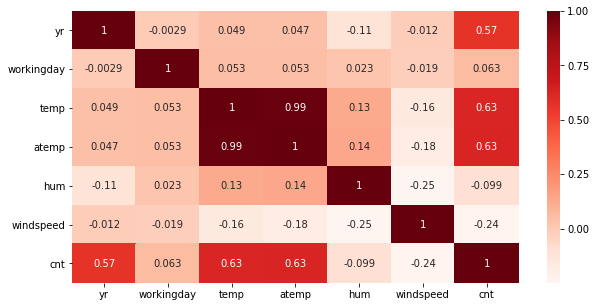

In [25]:
plt.figure(figsize = (10, 5))
sns.heatmap(bikes.corr(), annot = True, cmap = 'Reds')

#### We can see temp is highly correlated to atemp = 0.99
#### cnt is highly correlated to tem, atemp = 0.63 and year = 0.57
#### humidity and windspeed are negatively correlated = -0.25

# Section 2. EDA

### Check the distribution of the target variable.

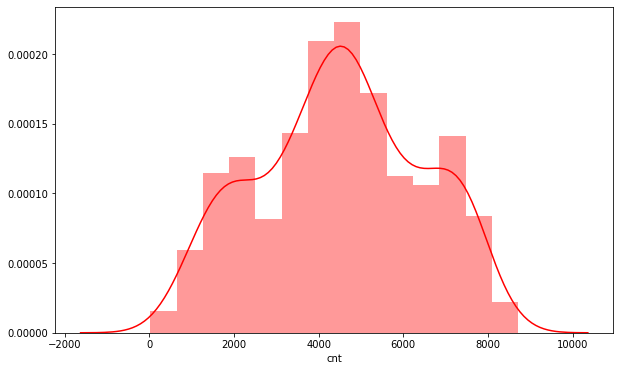

In [26]:
#SalePrice
plt.figure(figsize = (10,6))
sns.distplot(bikes['cnt'], color = 'red')

### BoxPlot

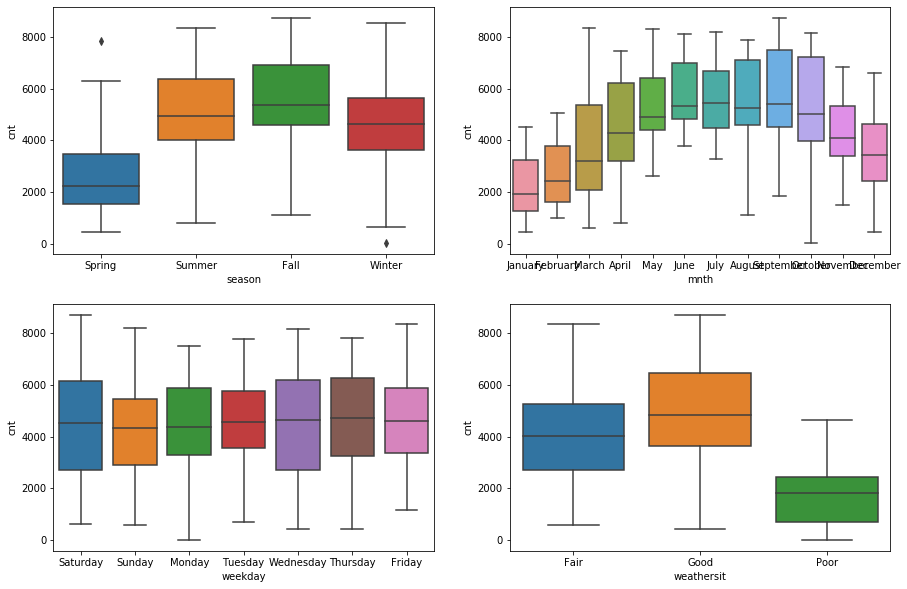

In [27]:
category = ['season','mnth',  'weekday', 'weathersit']
plt.figure(figsize = (15,10))

for i, j in enumerate(category, start = 1):
    
    plt.subplot(2, 2, i)
    sns.boxplot(x= j, y="cnt", data=bikes);
plt.show()

#### From Boxplots we can infer that when weather condition is good then demand of bikes is more, Day wise mean is similar, demand in Season is higher compared to other seasons, higher in September October.

### Pairplot

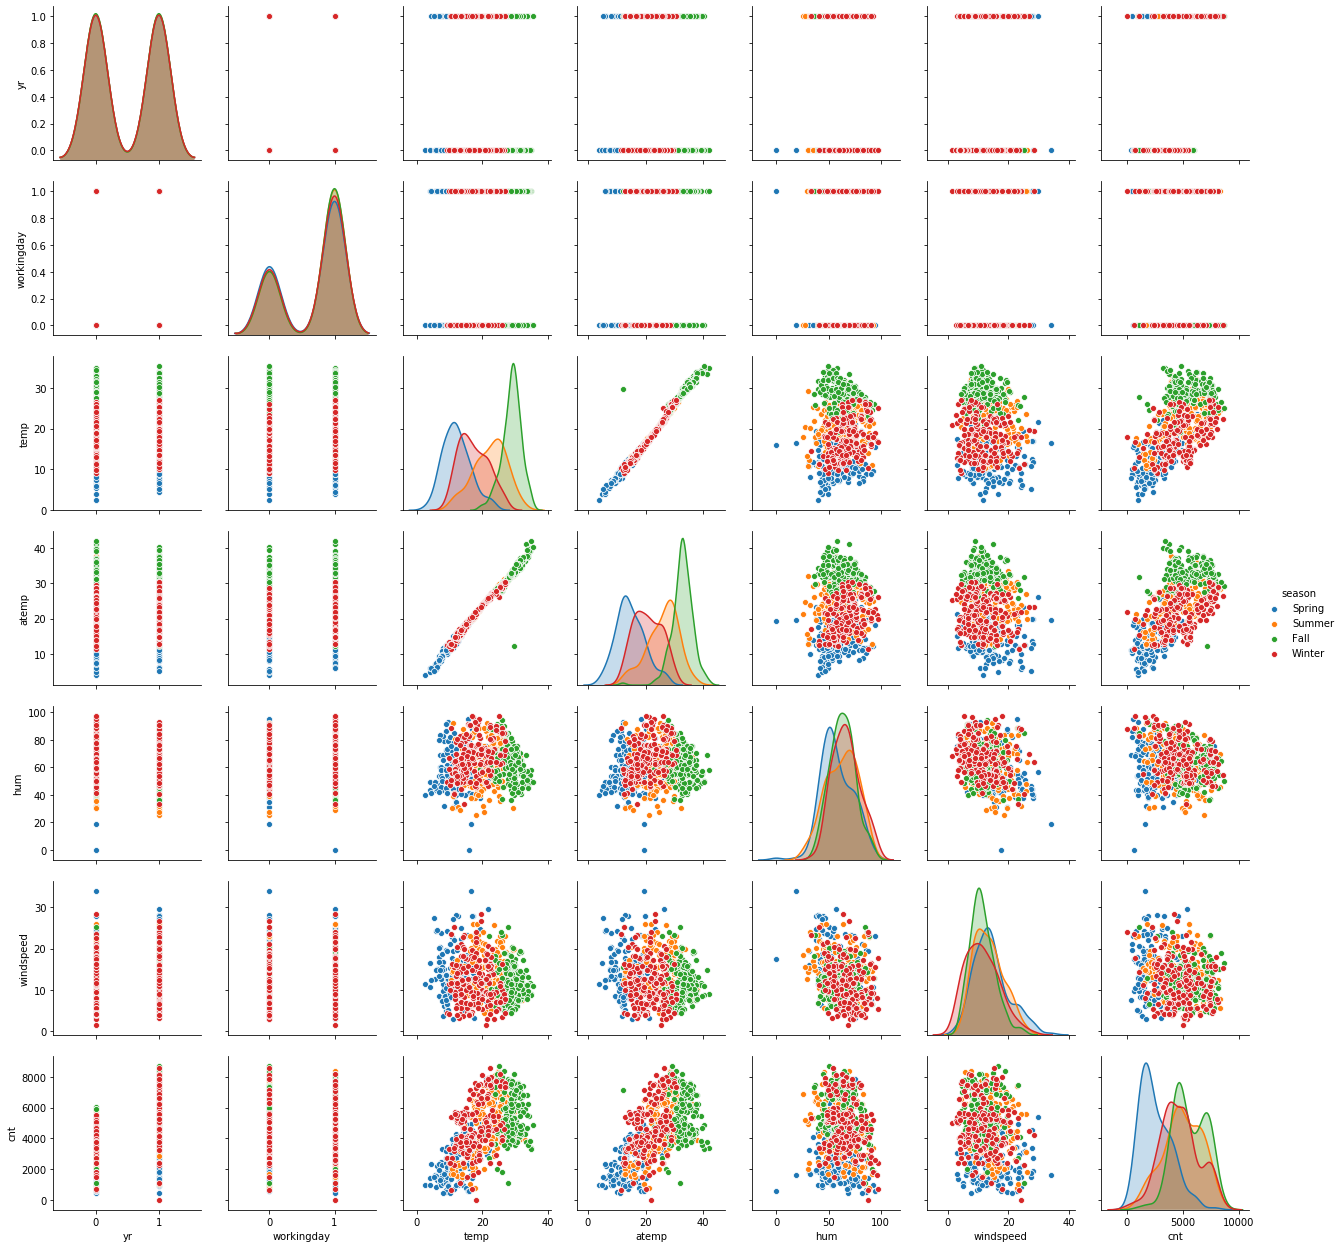

In [28]:
# Plotting PairPlot
sns.pairplot(bikes[:], hue = 'season')

### Inference  - Positive correlation of temp Vs count,  atemp Vs count and temp Vs atemp can be seen in pairplot

### FacetGrid Plot

<Figure size 1080x720 with 0 Axes>

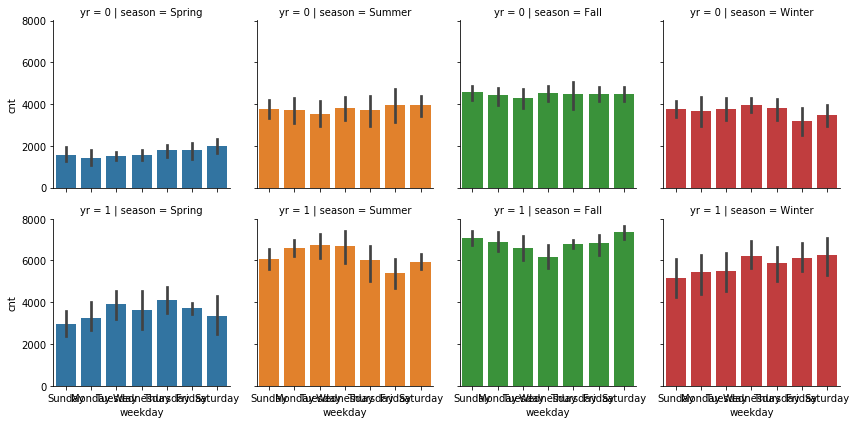

In [29]:
# FacetGrid
plt.figure(figsize = (15, 10))
grid = sns.FacetGrid(data = bikes, row = 'yr', col = 'season', hue = 'season' )
grid.map(sns.barplot, 'weekday',  'cnt' , order= None)
plt.show()

**Inference - for year 2019 In spring there is higher demand of bikes on weekdays ie Tue, Thu. Lowest is on Sunday.**

**In summer demand is high on Monday, Tuesday, Wednesday, Lowest is on Friday**

**In fall demand is Higher on Saturdays and Sundays, Lowest is on Wednesday**

**In Winter demand is high on Wednesday, Friday and Saturday, Lowest is on Sunday**

### BarPlot

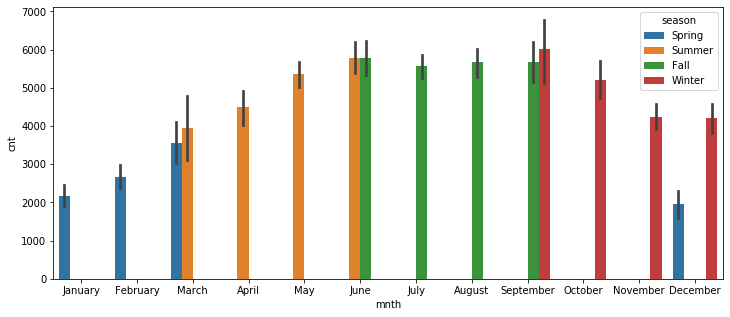

In [30]:
# Month Vs Count
plt.figure(figsize = (12, 5))
sns.barplot(data = bikes, x = 'mnth', y = 'cnt', hue = 'season')

**Inference - From the plot it can be seen that there is steady increase in demand for bikes from January to June. In Fall ie June, July, August, September the demand is very high, then by the second week of September there is fall in demand.**

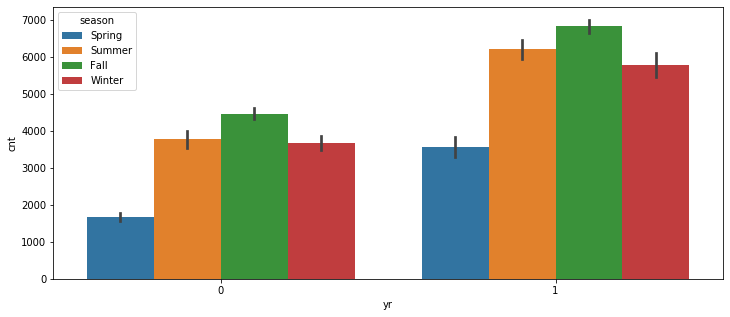

In [31]:
plt.figure(figsize = (12, 5))
sns.barplot(data = bikes, x = 'yr', y = 'cnt', hue = 'season')
plt.show()

**Inference- It can be seen that there was an overall increase in demand for bikes in 2019 when compared to year 2018. The higher demand was in Fall(season) for both the years**

## Dummy Variables

#### season, mnth, weekday and weathersit will be converted to dummy variables

In [32]:
bikes.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,Saturday,0,Fair,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,Sunday,0,Fair,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,Monday,1,Good,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,Tuesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,Wednesday,1,Good,9.305237,11.46350,43.6957,12.522300,1600


In [33]:
# Dummies for season Column
bikes = pd.get_dummies(bikes, prefix = ['Season'], columns = ['season'],  drop_first= True)
bikes.head()

,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Season_Spring,Season_Summer,Season_Winter
0,0,January,Saturday,0,Fair,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,January,Sunday,0,Fair,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,January,Monday,1,Good,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,January,Tuesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,January,Wednesday,1,Good,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [34]:
bikes.shape

(730, 13)

In [35]:
# Dummies for month
bikes = pd.get_dummies(bikes, prefix = ['Month'], columns = ['mnth'], drop_first= True)
bikes.head()

,yr,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Season_Spring,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0,Saturday,0,Fair,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,Sunday,0,Fair,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,Monday,1,Good,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,Tuesday,1,Good,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,Wednesday,1,Good,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [36]:
bikes.shape

(730, 23)

In [37]:
# Dummies for weekday
bikes = pd.get_dummies(bikes, prefix = 'Day', columns = ['weekday'], drop_first= True)
bikes.head()

,yr,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Season_Spring,Season_Summer,...,Month_May,Month_November,Month_October,Month_September,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,0,0,Fair,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Fair,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,Good,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,Good,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,Good,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
bikes.shape

(730, 28)

In [39]:
# Dummies for weathersit
bikes = pd.get_dummies(bikes, prefix = 'Situation', columns = ['weathersit'])
bikes.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,Season_Spring,Season_Summer,Season_Winter,...,Month_September,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Situation_Fair,Situation_Good,Situation_Poor
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,1,0,1,0


## Derived Variables

#### windspeed is related to weather, during bad weather wind speeds are very high and vice versa

In [40]:
# Multiplying windspeed with the condition of weather and making a new column for that
bikes['Wind_Situation_Fair'] = bikes['windspeed'] * bikes['Situation_Fair']
bikes['Wind_Situation_Good'] = bikes['windspeed'] * bikes['Situation_Good']
bikes['Wind_Situation_Poor'] = bikes['windspeed'] * bikes['Situation_Poor']

In [41]:
bikes.head()

,yr,workingday,temp,atemp,hum,windspeed,cnt,Season_Spring,Season_Summer,Season_Winter,...,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Situation_Fair,Situation_Good,Situation_Poor,Wind_Situation_Fair,Wind_Situation_Good,Wind_Situation_Poor
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,10.749882,0.000000,0.0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,1,0,0,0,1,0,0,16.652113,0.000000,0.0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,1,0,0.000000,16.636703,0.0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,1,0,0,1,0,0.000000,10.739832,0.0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,1,0,1,0,0.000000,12.522300,0.0


### Dropping Unwanted Columns

In [42]:
bikes.drop([  'windspeed', 'Situation_Fair', 'Situation_Good', 'Situation_Poor'], axis = 1, inplace = True)

In [43]:
bikes.head()

,yr,workingday,temp,atemp,hum,cnt,Season_Spring,Season_Summer,Season_Winter,Month_August,...,Month_September,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Wind_Situation_Fair,Wind_Situation_Good,Wind_Situation_Poor
0,0,0,14.110847,18.18125,80.5833,985,1,0,0,0,...,0,0,1,0,0,0,0,10.749882,0.000000,0.0
1,0,0,14.902598,17.68695,69.6087,801,1,0,0,0,...,0,0,0,1,0,0,0,16.652113,0.000000,0.0
2,0,1,8.050924,9.47025,43.7273,1349,1,0,0,0,...,0,1,0,0,0,0,0,0.000000,16.636703,0.0
3,0,1,8.200000,10.60610,59.0435,1562,1,0,0,0,...,0,0,0,0,0,1,0,0.000000,10.739832,0.0
4,0,1,9.305237,11.46350,43.6957,1600,1,0,0,0,...,0,0,0,0,0,0,1,0.000000,12.522300,0.0


In [44]:
bikes.shape

(730, 29)

## Statistical Description

In [45]:
bikes.describe().T

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000
Season_Spring,730.0,0.246575,0.431313,0.000000,0.000000,0.000000,0.000000,1.000000
Season_Summer,730.0,0.252055,0.434490,0.000000,0.000000,0.000000,1.000000,1.000000
Season_Winter,730.0,0.243836,0.429689,0.000000,0.000000,0.000000,0.000000,1.000000
Month_August,730.0,0.084932,0.278971,0.000000,0.000000,0.000000,0.000000,1.000000


## Heatmap 2

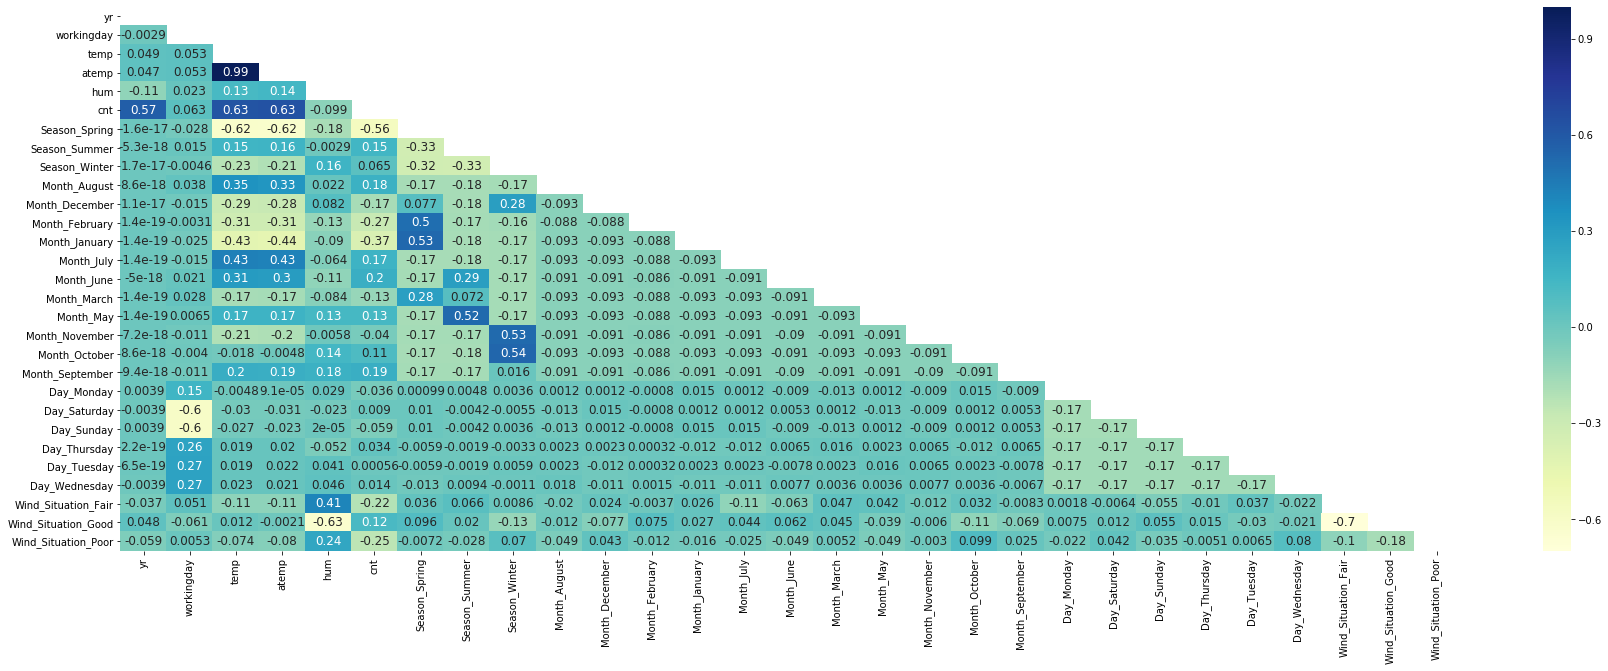

In [46]:
plt.figure(figsize = (30, 10))
cor = bikes.corr()
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(cor, mask = mask, annot = True, cmap = "YlGnBu", annot_kws={"size":12})
plt.show()

## Splitting the Data into Training and Testing Sets

In [47]:
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [48]:
bikes_train.shape

(510, 29)

In [49]:
bikes_train.head()

,yr,workingday,temp,atemp,hum,cnt,Season_Spring,Season_Summer,Season_Winter,Month_August,...,Month_September,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Wind_Situation_Fair,Wind_Situation_Good,Wind_Situation_Poor
653,1,1,19.201653,23.0423,55.8333,7534,0,0,1,0,...,0,0,0,0,0,1,0,0.000000,12.208807,0.0
576,1,1,29.246653,33.1448,70.4167,7216,0,0,0,0,...,0,0,0,0,0,1,0,0.000000,11.083475,0.0
426,1,0,16.980847,20.6746,62.1250,4066,1,0,0,0,...,0,0,1,0,0,0,0,10.792293,0.000000,0.0
728,1,0,10.489153,11.5850,48.3333,1796,1,0,0,0,...,0,0,0,1,0,0,0,0.000000,23.500518,0.0
482,1,0,15.443347,18.8752,48.9583,4220,0,1,0,0,...,0,0,1,0,0,0,0,8.708325,0.000000,0.0


In [50]:
bikes_test.shape

(219, 29)

## Rescaling The Features

### Using MinMax Scaler

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

### Scaling Train Data

In [53]:
bikes_train.iloc[:,:] = scaler.fit_transform(bikes_train.values)
bikes_train.head()

,yr,workingday,temp,atemp,hum,cnt,Season_Spring,Season_Summer,Season_Winter,Month_August,...,Month_September,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Wind_Situation_Fair,Wind_Situation_Good,Wind_Situation_Poor
653,1.0,1.0,0.509887,0.501133,0.575354,0.864243,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.359082,0.0
576,1.0,1.0,0.815169,0.766351,0.725633,0.827658,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.325984,0.0
426,1.0,0.0,0.442393,0.438975,0.640189,0.465255,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.404713,0.000000,0.0
728,1.0,0.0,0.245101,0.200348,0.498067,0.204096,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.691191,0.0
482,1.0,0.0,0.395666,0.391735,0.504508,0.482973,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.326564,0.000000,0.0


### Scaling Test Data

In [54]:
bikes_test.iloc[:,:] = scaler.transform(bikes_test.values)
bikes_test.head()


y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [55]:
X_test.shape, y_test.shape

((219, 28), (219,))

## Dividing Train Data into X and Y sets for the model building

In [56]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [57]:
X_train.shape, y_train.shape

((510, 28), (510,))

# Section 3 - Model selection and Analysis


### RFE ---- Recursive feature elimination

In [58]:
# Running RFE with output number of variables equal to 15
lm = LinearRegression()
lm = lm.fit(X_train, y_train)

In [59]:
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('Season_Spring', True, 1),
 ('Season_Summer', False, 6),
 ('Season_Winter', True, 1),
 ('Month_August', False, 7),
 ('Month_December', True, 1),
 ('Month_February', False, 4),
 ('Month_January', True, 1),
 ('Month_July', True, 1),
 ('Month_June', False, 11),
 ('Month_March', False, 14),
 ('Month_May', False, 5),
 ('Month_November', True, 1),
 ('Month_October', False, 10),
 ('Month_September', False, 2),
 ('Day_Monday', False, 8),
 ('Day_Saturday', True, 1),
 ('Day_Sunday', False, 3),
 ('Day_Thursday', False, 12),
 ('Day_Tuesday', False, 9),
 ('Day_Wednesday', False, 13),
 ('Wind_Situation_Fair', True, 1),
 ('Wind_Situation_Good', True, 1),
 ('Wind_Situation_Poor', True, 1)]

In [61]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'Season_Spring',
       'Season_Winter', 'Month_December', 'Month_January', 'Month_July',
       'Month_November', 'Day_Saturday', 'Wind_Situation_Fair',
       'Wind_Situation_Good', 'Wind_Situation_Poor'],
      dtype='object')

In [62]:
X_train.columns[~rfe.support_]

Index(['Season_Summer', 'Month_August', 'Month_February', 'Month_June',
       'Month_March', 'Month_May', 'Month_October', 'Month_September',
       'Day_Monday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday',
       'Day_Wednesday'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

### Model 1

In [63]:
# Creating X dataframe with rfe
X_train_1 = X_train[col]
X_train_1.head()

,yr,workingday,temp,atemp,hum,Season_Spring,Season_Winter,Month_December,Month_January,Month_July,Month_November,Day_Saturday,Wind_Situation_Fair,Wind_Situation_Good,Wind_Situation_Poor
653,1.0,1.0,0.509887,0.501133,0.575354,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.359082,0.0
576,1.0,1.0,0.815169,0.766351,0.725633,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.325984,0.0
426,1.0,0.0,0.442393,0.438975,0.640189,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.404713,0.000000,0.0
728,1.0,0.0,0.245101,0.200348,0.498067,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.691191,0.0
482,1.0,0.0,0.395666,0.391735,0.504508,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.326564,0.000000,0.0


In [64]:
# Adding a constant
import statsmodels.api as sm

In [65]:
X_train_1 = sm.add_constant(X_train_1)
X_train_1.head()

,const,yr,workingday,temp,atemp,hum,Season_Spring,Season_Winter,Month_December,Month_January,Month_July,Month_November,Day_Saturday,Wind_Situation_Fair,Wind_Situation_Good,Wind_Situation_Poor
653,1.0,1.0,1.0,0.509887,0.501133,0.575354,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.359082,0.0
576,1.0,1.0,1.0,0.815169,0.766351,0.725633,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.325984,0.0
426,1.0,1.0,0.0,0.442393,0.438975,0.640189,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.404713,0.000000,0.0
728,1.0,1.0,0.0,0.245101,0.200348,0.498067,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.691191,0.0
482,1.0,1.0,0.0,0.395666,0.391735,0.504508,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.326564,0.000000,0.0


In [66]:
X_train_1.shape

(510, 16)

In [67]:
 # Running the linear model
lm = sm.OLS(y_train, X_train_1).fit()
lm

In [68]:
#Summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     181.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          7.47e-190
Time:                        21:42:27   Log-Likelihood:                 516.27
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     494   BIC:                            -932.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3113    

#### We can see 'atemp' is insignificant having p value > 0.366

## VIF

In [69]:
X_train_1 = X_train_1.drop(['const'], axis=1)

In [70]:
# Creating DataFrame that will contain the name of all the features and their respective VIF

vif = pd.DataFrame()
X = X_train_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,351.11
3,atemp,349.77
4,hum,23.90
1,workingday,4.70
13,Wind_Situation_Good,4.09
5,Season_Spring,3.11
12,Wind_Situation_Fair,3.10
6,Season_Winter,3.03
0,yr,2.07
11,Day_Saturday,1.84


### Train Values Correleation

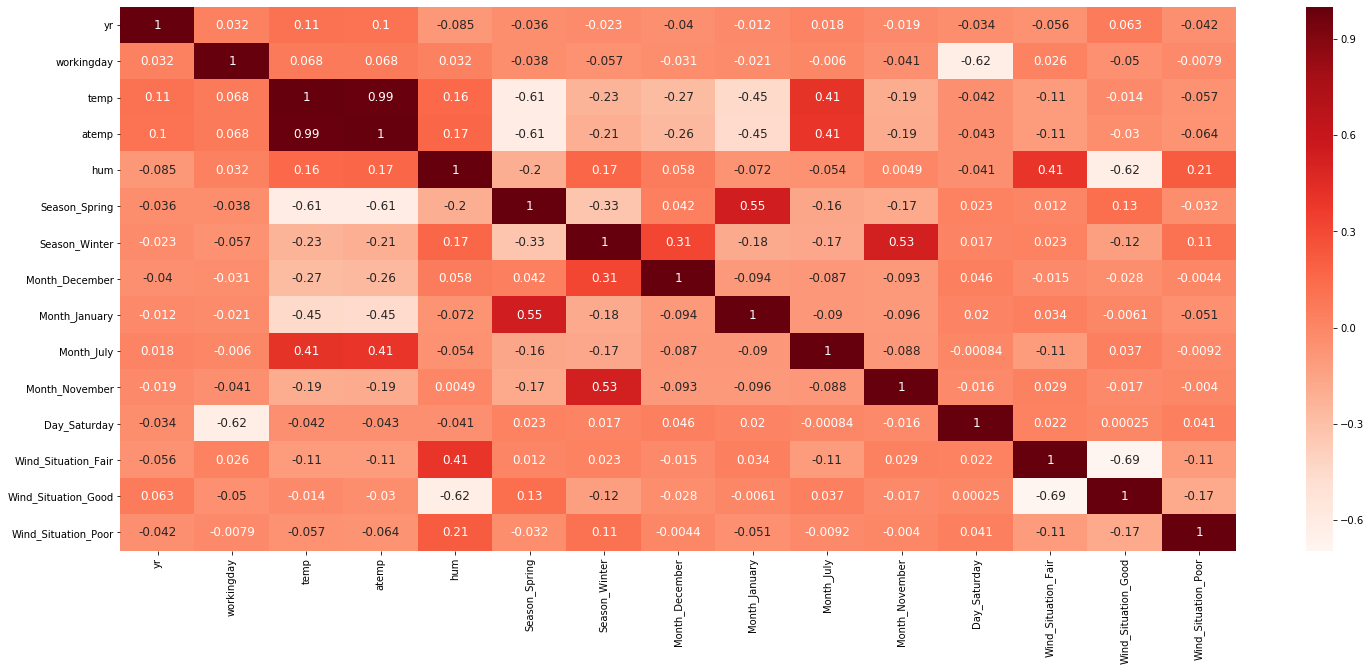

In [71]:
plt.figure(figsize = (25, 10))
sns.heatmap(X.corr(), annot = True, cmap = 'Reds', annot_kws={"size":12})
plt.show()

## TESTING 1

In [72]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

r2 = r2_score(y_true = y_test, y_pred = y_pred) 
print(r2)  

0.81685030450063


### Plotting Residual  1

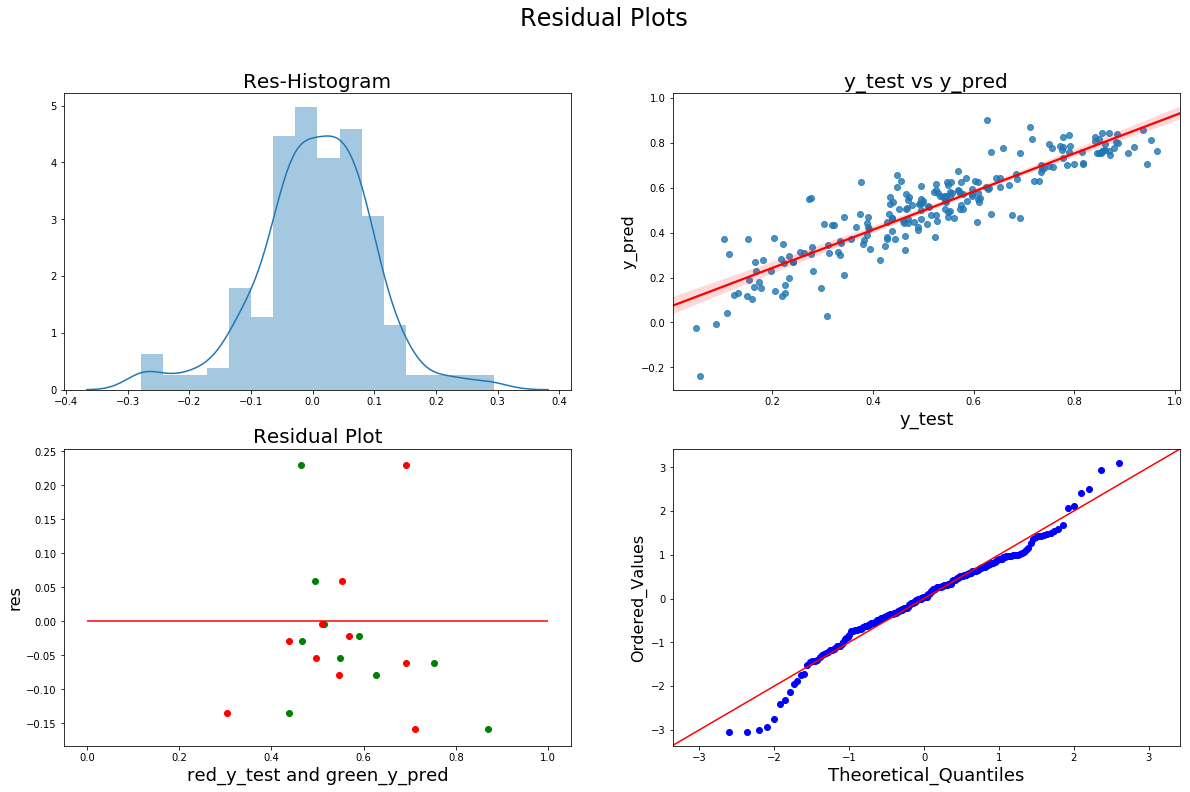

In [73]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = 0, xmax = 1, color = 'red')
plt.scatter(y_pred[:10], res[:10], c = 'green')
plt.scatter(y_test[:10], res[:10], c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('red_y_test and green_y_pred', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label

ax =  plt.subplot(2,2,4)
fig = sm.qqplot(res,  fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

### Model 2

In [74]:
X_train_2 = X_train_1.drop(["atemp"], axis = 1)
X_train_2.head()

,yr,workingday,temp,hum,Season_Spring,Season_Winter,Month_December,Month_January,Month_July,Month_November,Day_Saturday,Wind_Situation_Fair,Wind_Situation_Good,Wind_Situation_Poor
653,1.0,1.0,0.509887,0.575354,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.359082,0.0
576,1.0,1.0,0.815169,0.725633,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.325984,0.0
426,1.0,0.0,0.442393,0.640189,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.404713,0.000000,0.0
728,1.0,0.0,0.245101,0.498067,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.691191,0.0
482,1.0,0.0,0.395666,0.504508,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.326564,0.000000,0.0


In [75]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_2 = sm.add_constant(X_train_2)

In [76]:
lm = sm.OLS(y_train,X_train_2).fit()   # Running the linear model

In [77]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          7.90e-191
Time:                        21:42:35   Log-Likelihood:                 515.85
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     495   BIC:                            -938.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3138    

In [78]:
X_train_2 = X_train_2.drop(['const'], axis=1)

In [79]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.43
2,temp,18.57
1,workingday,4.69
12,Wind_Situation_Good,4.03
4,Season_Spring,3.11
11,Wind_Situation_Fair,3.03
5,Season_Winter,3.00
0,yr,2.07
10,Day_Saturday,1.84
9,Month_November,1.80


### TESTING 2

In [80]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

r2 = r2_score(y_true = y_test, y_pred = y_pred) 
print(r2)

0.8159091444392274


### Plotting Residual  2

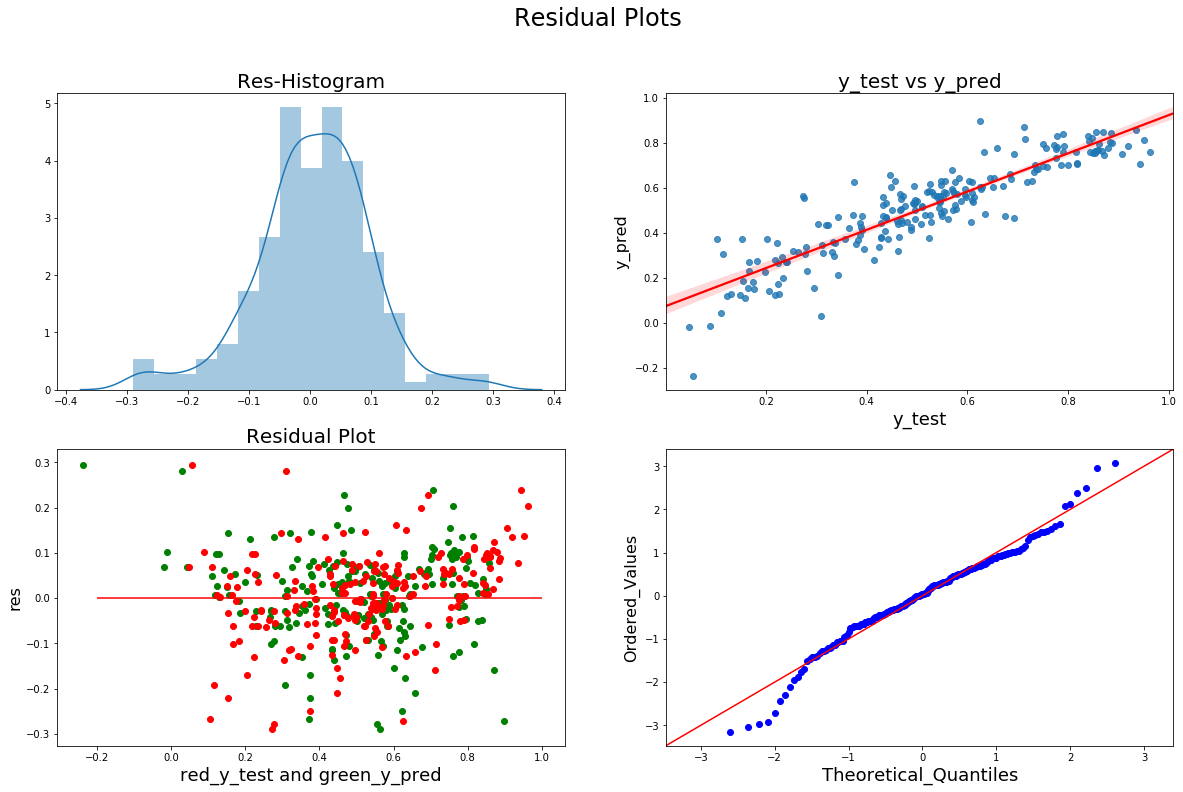

In [81]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = -0.2, xmax = 1, color = 'red')
plt.scatter(y_pred, res, c = 'green')
plt.scatter(y_test, res, c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('red_y_test and green_y_pred', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label

ax =  plt.subplot(2,2,4)
fig = sm.qqplot(res, fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

### Dropping 'hum' having VIF = 23.43

### Model 3

In [82]:
X_train_3 = X.drop(["hum"], axis = 1)
X_train_3.head()

,yr,workingday,temp,Season_Spring,Season_Winter,Month_December,Month_January,Month_July,Month_November,Day_Saturday,Wind_Situation_Fair,Wind_Situation_Good,Wind_Situation_Poor
653,1.0,1.0,0.509887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.359082,0.0
576,1.0,1.0,0.815169,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.325984,0.0
426,1.0,0.0,0.442393,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.404713,0.000000,0.0
728,1.0,0.0,0.245101,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.691191,0.0
482,1.0,0.0,0.395666,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.326564,0.000000,0.0


In [83]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_3 = sm.add_constant(X_train_3)

In [84]:
X_train_3.head()

,const,yr,workingday,temp,Season_Spring,Season_Winter,Month_December,Month_January,Month_July,Month_November,Day_Saturday,Wind_Situation_Fair,Wind_Situation_Good,Wind_Situation_Poor
653,1.0,1.0,1.0,0.509887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.359082,0.0
576,1.0,1.0,1.0,0.815169,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.325984,0.0
426,1.0,1.0,0.0,0.442393,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.404713,0.000000,0.0
728,1.0,1.0,0.0,0.245101,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.691191,0.0
482,1.0,1.0,0.0,0.395666,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.326564,0.000000,0.0


In [85]:
lm = sm.OLS(y_train,X_train_3).fit()   # Running the linear model

In [86]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     204.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.65e-189
Time:                        21:42:40   Log-Likelihood:                 509.93
No. Observations:                 510   AIC:                            -991.9
Df Residuals:                     496   BIC:                            -932.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2384    

In [87]:
X_train_3 = X_train_3.drop(['const'], axis=1)

In [88]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.95
1,workingday,4.55
11,Wind_Situation_Good,4.01
10,Wind_Situation_Fair,2.61
4,Season_Winter,2.57
3,Season_Spring,2.56
0,yr,2.07
9,Day_Saturday,1.82
8,Month_November,1.78
6,Month_January,1.66


## TESTING 3

In [89]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

r2 = r2_score(y_true = y_test, y_pred = y_pred) 
print(r2) 

0.8081964006730156


### Plotting Residual 3

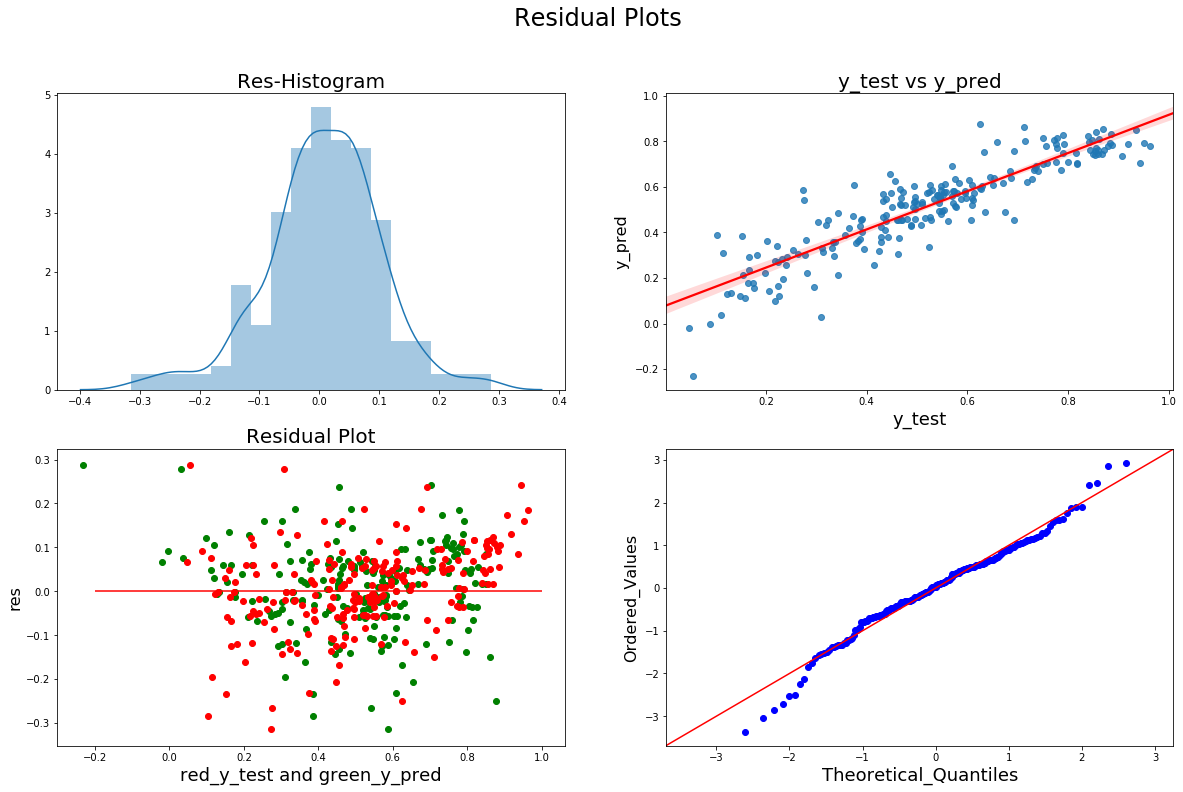

In [90]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = -0.2, xmax = 1, color = 'red')
plt.scatter(y_pred, res, c = 'green')
plt.scatter(y_test, res, c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('red_y_test and green_y_pred', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label

ax = plt.subplot(2,2,4)
fig = sm.qqplot(res,  fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

#### Dropping workingday having VIF = 4.55

### Model 4

In [91]:
X_train_4 = X.drop(["workingday"], axis = 1)
X_train_4.head()

,yr,temp,Season_Spring,Season_Winter,Month_December,Month_January,Month_July,Month_November,Day_Saturday,Wind_Situation_Fair,Wind_Situation_Good,Wind_Situation_Poor
653,1.0,0.509887,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.359082,0.0
576,1.0,0.815169,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.325984,0.0
426,1.0,0.442393,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.404713,0.000000,0.0
728,1.0,0.245101,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.691191,0.0
482,1.0,0.395666,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.326564,0.000000,0.0


In [92]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_4 = sm.add_constant(X_train_4)

In [93]:
lm = sm.OLS(y_train,X_train_4).fit()   # Running the linear model

In [94]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.83e-186
Time:                        21:42:43   Log-Likelihood:                 498.91
No. Observations:                 510   AIC:                            -971.8
Df Residuals:                     497   BIC:                            -916.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2796    

In [95]:
X_train_4 = X_train_4.drop(['const'], axis=1)

In [96]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.02
10,Wind_Situation_Good,3.92
3,Season_Winter,2.55
9,Wind_Situation_Fair,2.50
2,Season_Spring,2.47
0,yr,2.07
7,Month_November,1.78
5,Month_January,1.64
4,Month_December,1.46
6,Month_July,1.31


## TESTING 4

In [97]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

r2 = r2_score(y_true = y_test, y_pred = y_pred) 
print(r2)

0.8047516197346235


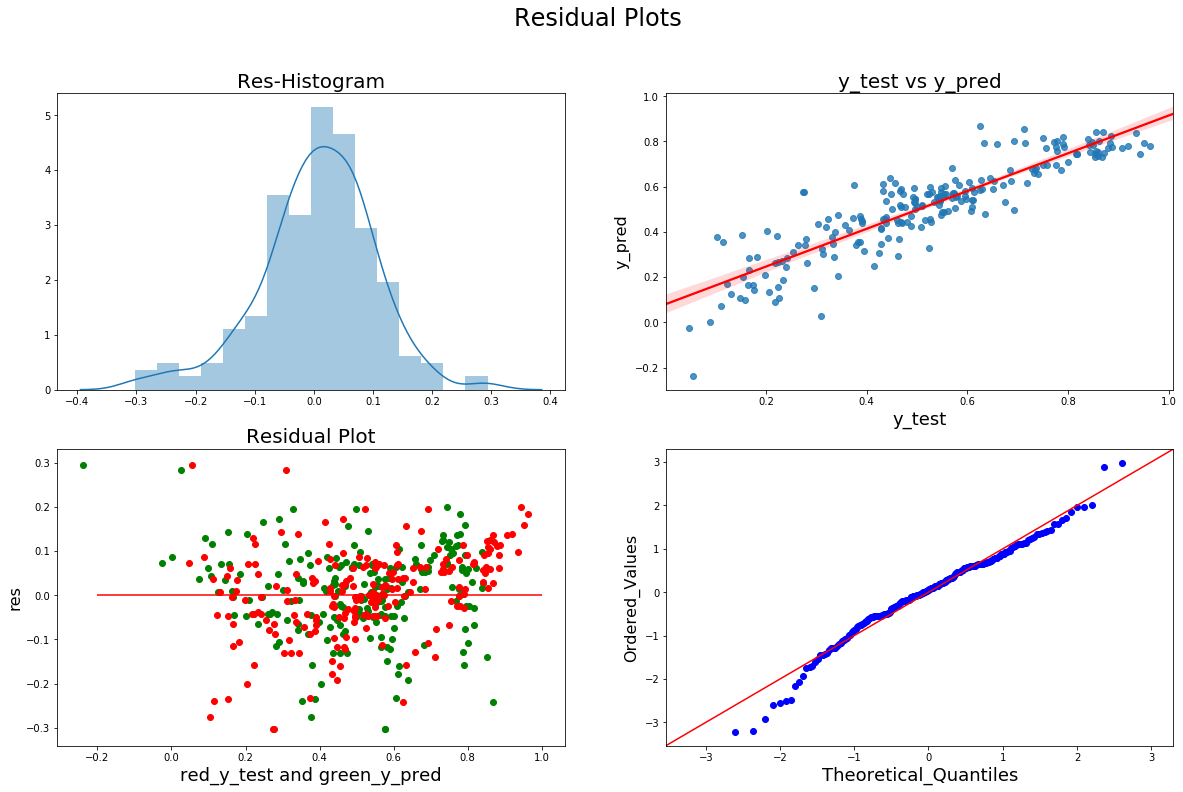

In [98]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = -0.2, xmax = 1, color = 'red')
plt.scatter(y_pred, res, c = 'green')
plt.scatter(y_test, res, c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('red_y_test and green_y_pred', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label

ax =  plt.subplot(2,2,4)
fig = sm.qqplot(res, fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

#### Dropping Day_Saturday having high p value

### Model 5

In [99]:
X_train_5 = X.drop(["Day_Saturday"], axis = 1)
X_train_5.head()

,yr,temp,Season_Spring,Season_Winter,Month_December,Month_January,Month_July,Month_November,Wind_Situation_Fair,Wind_Situation_Good,Wind_Situation_Poor
653,1.0,0.509887,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.359082,0.0
576,1.0,0.815169,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.325984,0.0
426,1.0,0.442393,1.0,0.0,0.0,0.0,0.0,0.0,0.404713,0.000000,0.0
728,1.0,0.245101,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.691191,0.0
482,1.0,0.395666,0.0,0.0,0.0,0.0,0.0,0.0,0.326564,0.000000,0.0


In [100]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_5 = sm.add_constant(X_train_5)

lm = sm.OLS(y_train,X_train_5).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     227.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.10e-186
Time:                        21:42:46   Log-Likelihood:                 496.26
No. Observations:                 510   AIC:                            -968.5
Df Residuals:                     498   BIC:                            -917.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2829    

In [101]:
X_train_5 = X_train_5.drop(['const'], axis=1)

In [102]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.99
9,Wind_Situation_Good,3.90
3,Season_Winter,2.55
8,Wind_Situation_Fair,2.48
2,Season_Spring,2.47
0,yr,2.07
7,Month_November,1.78
5,Month_January,1.64
4,Month_December,1.45
6,Month_July,1.31


## TESTING 5

In [103]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

r2 = r2_score(y_true = y_test, y_pred = y_pred) 
print(r2)

0.8046661071584136


### Plotting Residual 5

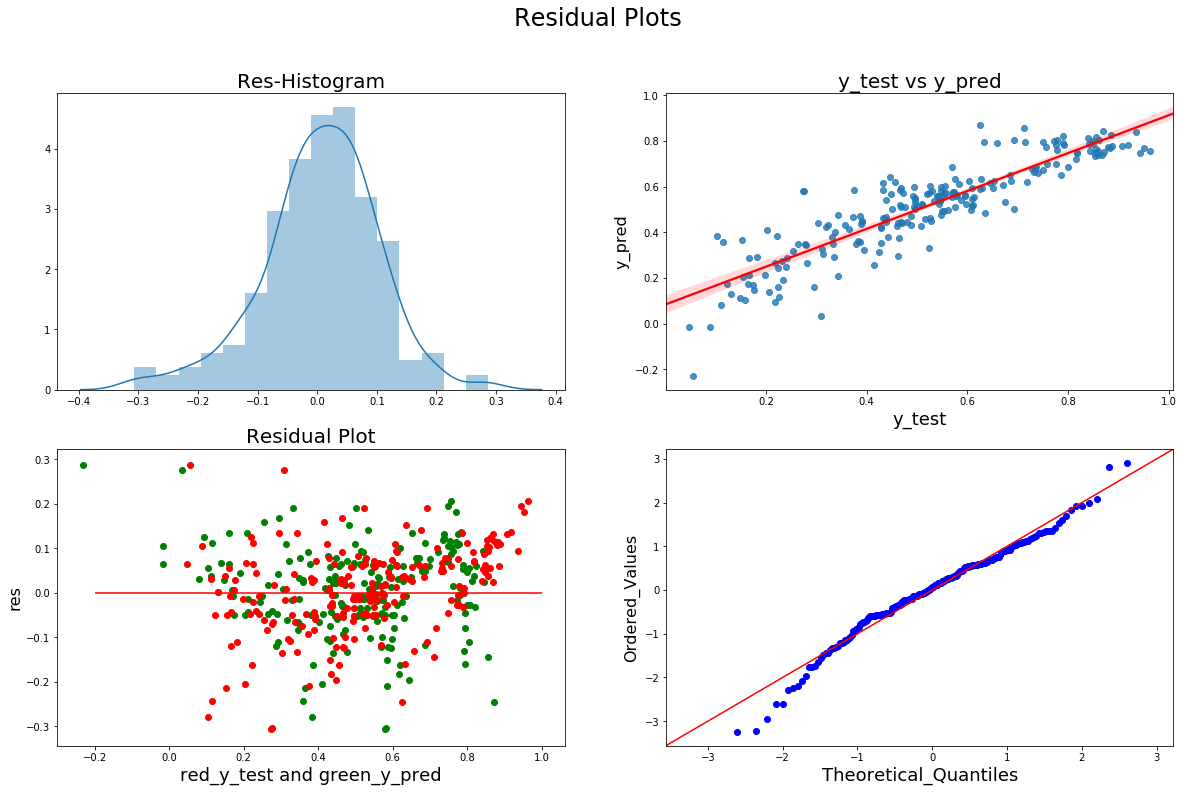

In [104]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = -0.2, xmax = 1, color = 'red')
plt.scatter(y_pred, res, c = 'green')
plt.scatter(y_test, res, c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('red_y_test and green_y_pred', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label

ax =  plt.subplot(2,2,4)
fig = sm.qqplot(res,  fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

#### Dropping Wind_Situation_Good

In [105]:
X_train_6 = X.drop(["Wind_Situation_Good"], axis = 1)
X_train_6.head()

,yr,temp,Season_Spring,Season_Winter,Month_December,Month_January,Month_July,Month_November,Wind_Situation_Fair,Wind_Situation_Poor
653,1.0,0.509887,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0
576,1.0,0.815169,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0
426,1.0,0.442393,1.0,0.0,0.0,0.0,0.0,0.0,0.404713,0.0
728,1.0,0.245101,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
482,1.0,0.395666,0.0,0.0,0.0,0.0,0.0,0.0,0.326564,0.0


In [106]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_6 = sm.add_constant(X_train_6)

lm = sm.OLS(y_train,X_train_6).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          9.28e-185
Time:                        21:42:50   Log-Likelihood:                 490.20
No. Observations:                 510   AIC:                            -958.4
Df Residuals:                     499   BIC:                            -911.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2385    

In [107]:
X_train_6 = X_train_6.drop(['const'], axis=1)

In [108]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.71
3,Season_Winter,2.52
0,yr,2.05
2,Season_Spring,1.91
7,Month_November,1.75
5,Month_January,1.63
4,Month_December,1.45
8,Wind_Situation_Fair,1.40
6,Month_July,1.29
9,Wind_Situation_Poor,1.06


## TESTING 6

In [109]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

r2 = r2_score(y_true = y_test, y_pred = y_pred) 
print(r2) 

0.811988434064388


### Plotting Residuals 6

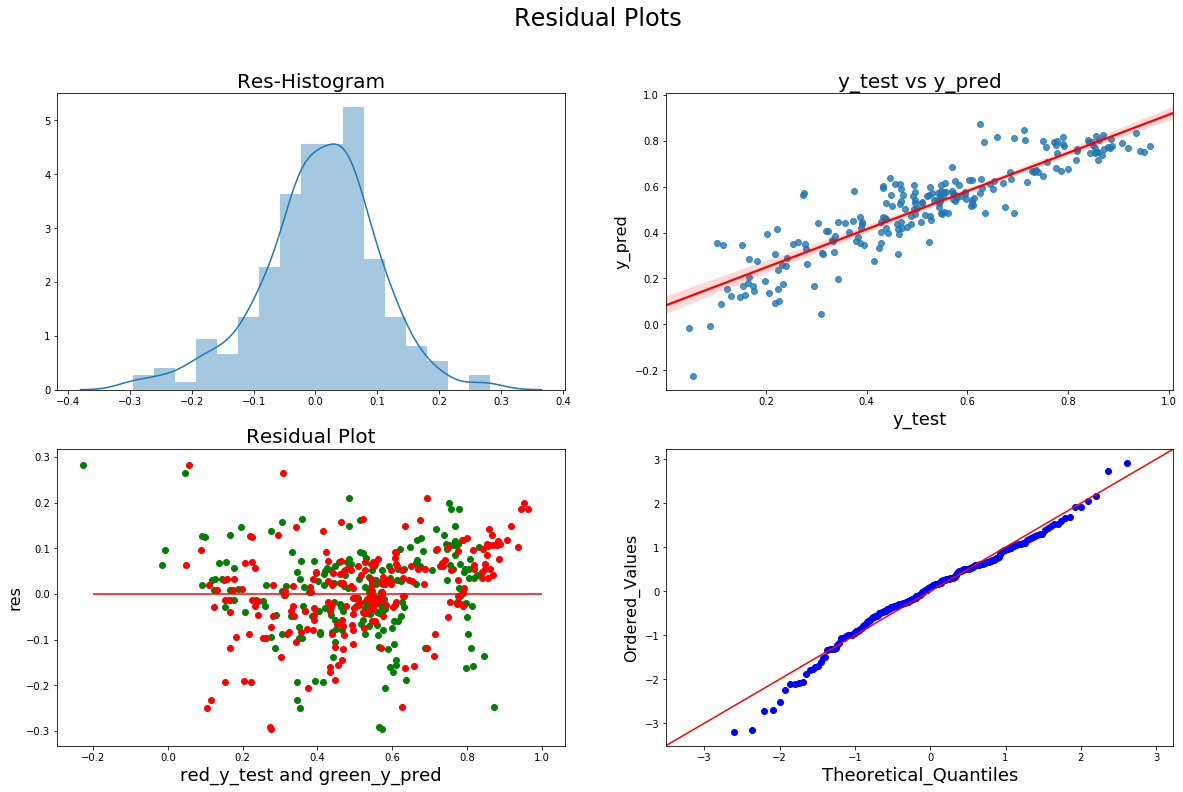

In [110]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = -0.2, xmax = 1, color = 'red')
plt.scatter(y_pred, res, c = 'green')
plt.scatter(y_test, res, c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('red_y_test and green_y_pred', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label

ax = plt.subplot(2,2,4)
fig = sm.qqplot(res,  fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

#### Dropping January

### Model 7

In [111]:
X_train_7 = X.drop(["Month_January"], axis = 1)
X_train_7.head()

,yr,temp,Season_Spring,Season_Winter,Month_December,Month_July,Month_November,Wind_Situation_Fair,Wind_Situation_Poor
653,1.0,0.509887,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
576,1.0,0.815169,0.0,0.0,0.0,1.0,0.0,0.000000,0.0
426,1.0,0.442393,1.0,0.0,0.0,0.0,0.0,0.404713,0.0
728,1.0,0.245101,1.0,0.0,1.0,0.0,0.0,0.000000,0.0
482,1.0,0.395666,0.0,0.0,0.0,0.0,0.0,0.326564,0.0


In [112]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_7 = sm.add_constant(X_train_7)

lm = sm.OLS(y_train,X_train_7).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     266.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.10e-184
Time:                        21:42:53   Log-Likelihood:                 486.47
No. Observations:                 510   AIC:                            -952.9
Df Residuals:                     500   BIC:                            -910.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2225    

In [113]:
X_train_7 = X_train_7.drop(['const'], axis=1)

In [114]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.68
3,Season_Winter,2.49
0,yr,2.04
6,Month_November,1.74
4,Month_December,1.41
7,Wind_Situation_Fair,1.39
5,Month_July,1.29
2,Season_Spring,1.26
8,Wind_Situation_Poor,1.06


## TESTING 7

In [115]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

r2 = r2_score(y_true = y_test, y_pred = y_pred) 
print(r2) 

0.8118791427774665


### Plotting Residuals 7

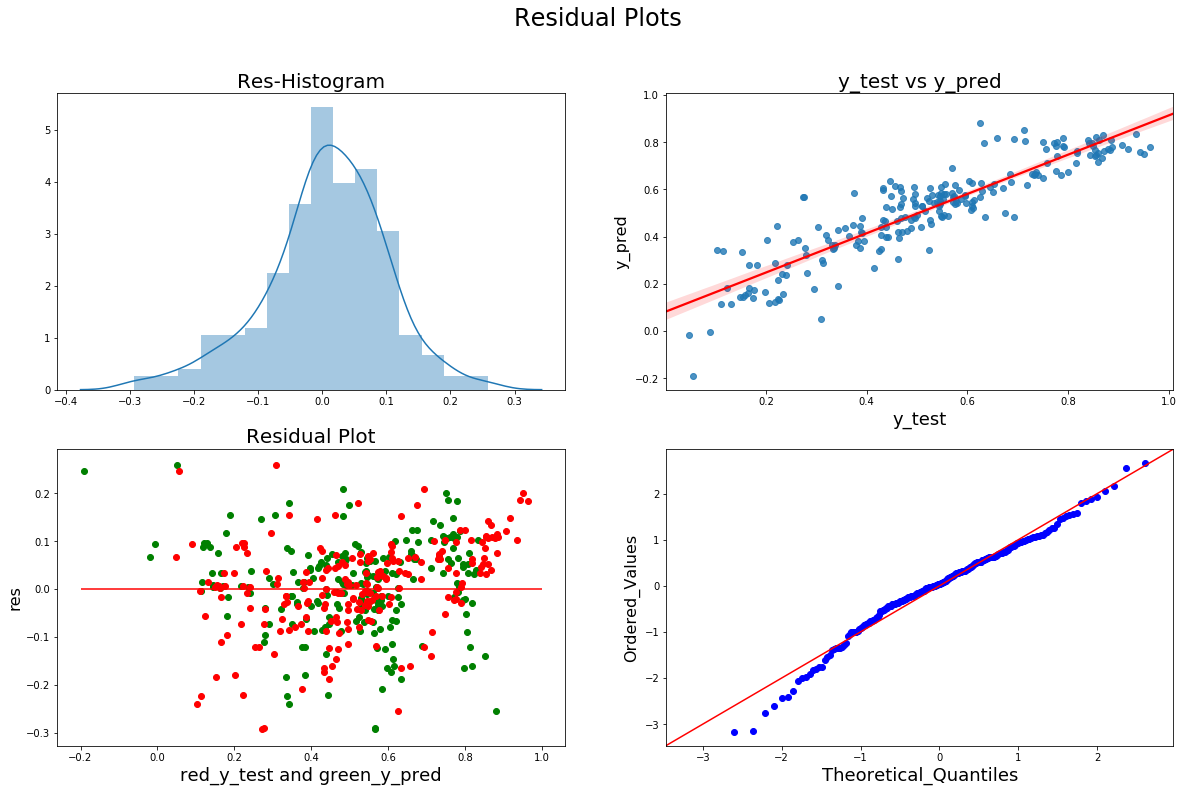

In [116]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = -0.2, xmax = 1, color = 'red')
plt.scatter(y_pred, res, c = 'green')
plt.scatter(y_test, res, c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('red_y_test and green_y_pred', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label                            # Y-label

ax =  plt.subplot(2,2,4)
fig = sm.qqplot(res,  fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

#### Dropping July

### Model 8

In [117]:
X_train_8 = X.drop(["Month_July"], axis = 1)
X_train_8.head()

,yr,temp,Season_Spring,Season_Winter,Month_December,Month_November,Wind_Situation_Fair,Wind_Situation_Poor
653,1.0,0.509887,0.0,1.0,0.0,0.0,0.000000,0.0
576,1.0,0.815169,0.0,0.0,0.0,0.0,0.000000,0.0
426,1.0,0.442393,1.0,0.0,0.0,0.0,0.404713,0.0
728,1.0,0.245101,1.0,0.0,1.0,0.0,0.000000,0.0
482,1.0,0.395666,0.0,0.0,0.0,0.0,0.326564,0.0


In [118]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_8 = sm.add_constant(X_train_8)

lm = sm.OLS(y_train,X_train_8).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     288.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.92e-182
Time:                        21:42:57   Log-Likelihood:                 477.96
No. Observations:                 510   AIC:                            -937.9
Df Residuals:                     501   BIC:                            -899.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2412    

In [119]:
X_train_8 = X_train_8.drop(['const'], axis=1)

In [120]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Season_Winter,2.44
1,temp,2.20
0,yr,2.04
5,Month_November,1.74
4,Month_December,1.41
6,Wind_Situation_Fair,1.38
2,Season_Spring,1.25
7,Wind_Situation_Poor,1.06


## Testing 8

In [121]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lm.predict(X_test_new)

r2 = r2_score(y_true = y_test, y_pred = y_pred) 
print(r2)

0.8080117119643175


### Plotting Residuals 8

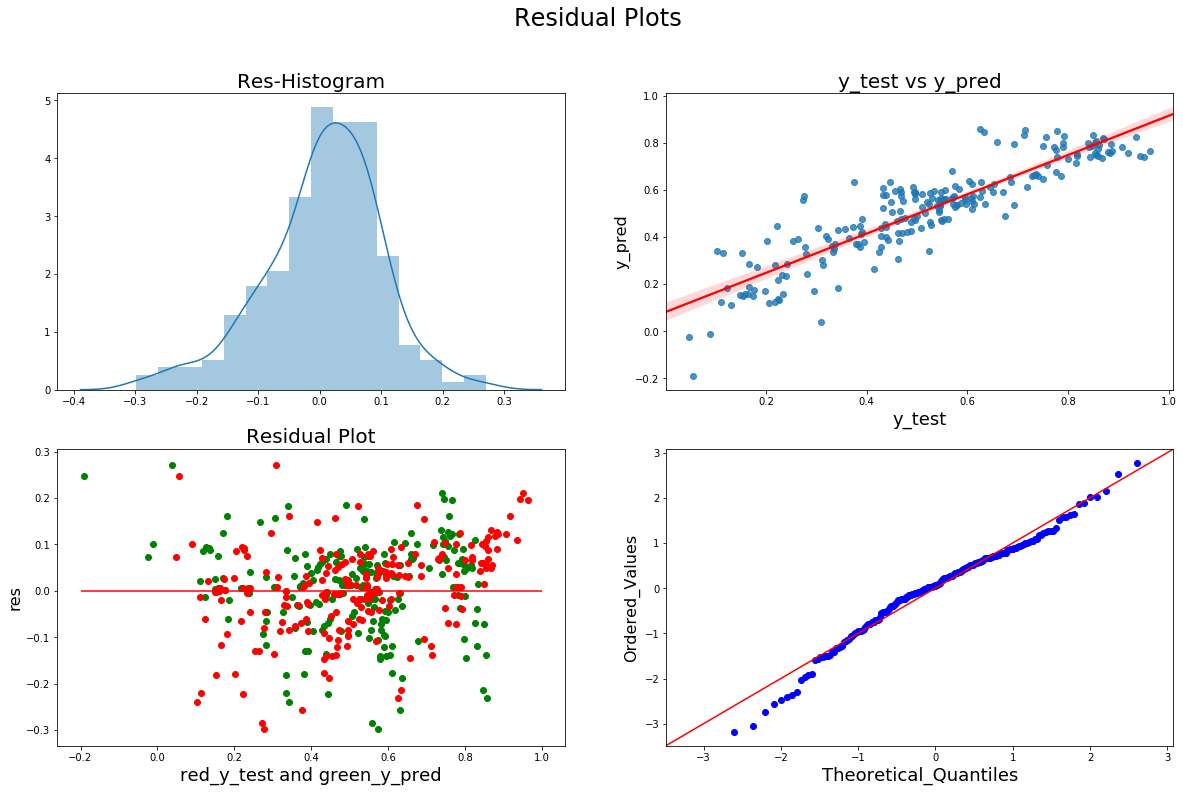

In [122]:
plt.figure(figsize = (20,12))


plt.subplot(2,2,1)
plt.suptitle('Residual Plots', fontsize=24)               # Plot heading 
res = y_test - y_pred
sns.distplot(res)
plt.title('Res-Histogram', fontsize=20)                   # Plot heading 

plt.subplot(2,2,2)
sns.regplot(x = y_test, y = y_pred, line_kws  = {'color': 'red'})
plt.title('y_test vs y_pred', fontsize=20)                # Plot heading 
plt.xlabel('y_test', fontsize=18)                         # X-label
plt.ylabel('y_pred', fontsize=16)                         # Y-label

plt.subplot(2,2,3)
plt.hlines(0, xmin = -0.2, xmax = 1, color = 'red')
plt.scatter(y_pred, res, c = 'green')
plt.scatter(y_test, res, c = 'red')
plt.title('Residual Plot', fontsize=20)                   # Plot heading 
plt.xlabel('red_y_test and green_y_pred', fontsize=18)                         # X-label
plt.ylabel('res', fontsize=16)                            # Y-label

ax = plt.subplot(2,2,4)
fig = sm.qqplot(res,  fit=True, line='45', ax = ax)
plt.xlabel('Theoretical_Quantiles', fontsize=18)          # X-label
plt.ylabel('Ordered_Values', fontsize=16)                 # Y-label
plt.show()

### Inferences

- The squared multiple correlation R² is equal to 0.821.
- Adj R2 = 0.819
- Test R2 = 0.808
- All of the variables are significant .
- Examination of the residuals indicates no unusual patterns. 
- The variables explains 82.1% of the variability of the data.
- VIF < 3 indicates no multicollinerity
- F-statistic: 288.3

## Final Regression Equation


**cnt = 0.2412 +0.2326*(yr) + 0.3973*(temp)-0.1345*(Season_Spring) +0.0772* (Season_Winter) -0.0499*(Month_December) - 0.0688*(Month_November)  - 0.1656*(Wind_Situation_Fair) - 0.4587*(Wind_Situation_Poor)**           
    


### Conclusions:
- for every increase in 1 unit year the total increase in bike demand is by 23.26% keeping all other variables constant.
- when wind weather situation increase by 1 unit the demand decreases by 16.56%
- All positive coefficients shows increase when there is unit increase in their variables, and negative coefficients shows decrease in demand when there is unit increase in the variables.

### Steps to be taken to increase bike demands
- temperature is a major factor in bike demands as it should be considered for marketing bike rentals.
- Every year demand is increasing so steps to be taken to meet up the demands, more bikes to be added up.
- Spring and Winter are good seasons for bike rentals
- Month of November and December more Marketing is required to improve rentals.
- Wind and Weather Condition plays an important role in demands, when wind is low demand is high.

# Model 8 Summary

## Train R2 = 82.2%
## Train Adj R2 = 81.9%
## F-statistic = 288.3
## AIC =  -937.9
## Final Model R2 Test = 80.801%
## Max VIF = 2.44
## Number of Variables = 8

In [123]:
# Thankyou